# Sklearn当中的逻辑回归与多分类问题

## 问题的定义

鸢尾花的分类,三种鸢尾花如何分类

## 多元分类的损失函数

多元分类的损失函数的选择与输出 编码,和标签的格式有关, 多元分类的标签有以下两种格式:

1. one-hot独热编码,如果数字0-9分类中8,格式可以表示为: [0,0,0,0,0,0,0,1,0]: 损失函数使用分类交叉熵
2. 直接转换为类别数字:1,2,3,4,如果输出的标签编码为类数字,损失函数一般使用稀疏分类交叉熵.

## 通过逻辑回归来解决多元分类问题

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
iris = datasets.load_iris() # 读取鸢尾花数据集
X_sepal = iris['data'][:,[0,1]]  # 花萼特征
X_petal = iris['data'][:,[2,3]]  # 花瓣的特征
y = iris['target']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_speal, X_test_speal, y_train_speal, y_test_speal = train_test_split( \
    X_sepal, y, test_size=0.2,random_state=1210
                                                                           )

print(f'花萼训练集样本数据: {X_train_speal.shape}')
print(f"花萼测试集样本数据: {X_test_speal.shape}")
print(f"花萼训练集样本便签: {y_train_speal.shape}")
scaler = StandardScaler()
X_train_speal = scaler.fit_transform(X_train_speal) 
X_test_speal = scaler.fit_transform(X_test_speal)

花萼训练集样本数据: (120, 2)
花萼测试集样本数据: (30, 2)
花萼训练集样本便签: (120,)


In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', C=0.1)
lr.fit(X_train_speal,y_train_speal) # 模型的训练

LogisticRegression(C=0.1)

In [21]:
score = lr.score(X_test_speal, y_test_speal) # 测试集上的评分
print(f"Sklearn逻辑回归测试准确率为: {score * 100:.2f}%")

Sklearn逻辑回归测试准确率为: 83.33%


注意: 这里默认采用的是L2正则,参数是通过penalty设定的,另外一个参数C表示正则化的力度,与我们之前岭回归和Lasso回归的正则化参数$\lambda$刚好相反,C值越小,正则化力度越大,岭回归和Lasso回归中,$\lambda$越大正则化力度越大

## 正则化参数的选择?如何选择一个比较不错的C值呢?

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1',solver='liblinear')
lr.fit(X_train_speal,y_train_speal) # 模型的训练
score = lr.score(X_test_speal, y_test_speal) # 测试集上的评分
print(f"Sklearn逻辑回归测试准确率为: {score * 100:.2f}%")

Sklearn逻辑回归测试准确率为: 83.33%


In [46]:
from matplotlib.colors import ListedColormap
plt.rcParams['font.sans-serif'] = 'Times New Roman'
rgb = [
    [255, 238, 255],  # 红色
    [219, 238, 244],  # 蓝色
    [228, 228, 228],  # 黑色
]
rgb = np.array(rgb) / 255
cmap_light = ListedColormap(rgb)

In [84]:
X_combine_speal = np.vstack((X_train_speal, X_test_speal))
Y_combine_speal = np.hstack((y_train_speal, y_test_speal))
tb = pd.DataFrame(X_combine_speal)
tb['target'] = Y_combine_speal

In [168]:
def plot_region(X,y, classifier, tb,penalty,C,score,resolution=0.02,):
    markter = ('o', 's', 'v')
    colors = ('red', 'blue', 'orange')
    labels = iris['target_names'].tolist()
    x1_min = X[:,0].min() - 0.2
    x1_max = X[:,0].max() + 0.2
    x2_min = X[:,1].min() - 0.2
    x2_max = X[:,1].max() + 0.2
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),
                          np.arange(x2_min, x2_max, resolution)
                          )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, cmap = cmap_light) # 使用预测结果填充决策区域
    plt.contour(xx1, xx2, Z
               )
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for i in range(3):
        plt.scatter(tb[tb['target'] == i][0],tb[tb['target']==i][1],
            marker=markter[i],c = colors[i],label = labels[i],edgecolor='white',
            linewidths=0.4, alpha=0.8,
                )
    plt.legend()
    plt.xlabel('Speal Length')
    plt.ylabel('Speal Widths')
    plt.title(f'正则化: {penalty}, C值为: {C} 整个数据集上模型准确率为: {score * 100:.2f}%',
             fontproperties='STsong',fontsize=15
             )

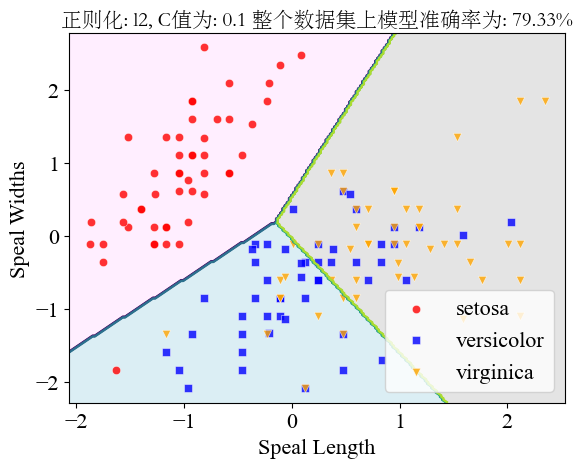

In [169]:
lr = LogisticRegression(penalty='l2',C=0.1)
lr.fit(X_train_speal,y_train_speal)
score = lr.score(X_combine_speal,Y_combine_speal)

plot_region(X=X_combine_speal,y=Y_combine_speal,penalty='l2',C=0.1,
            score=score,tb=tb,classifier=lr, )

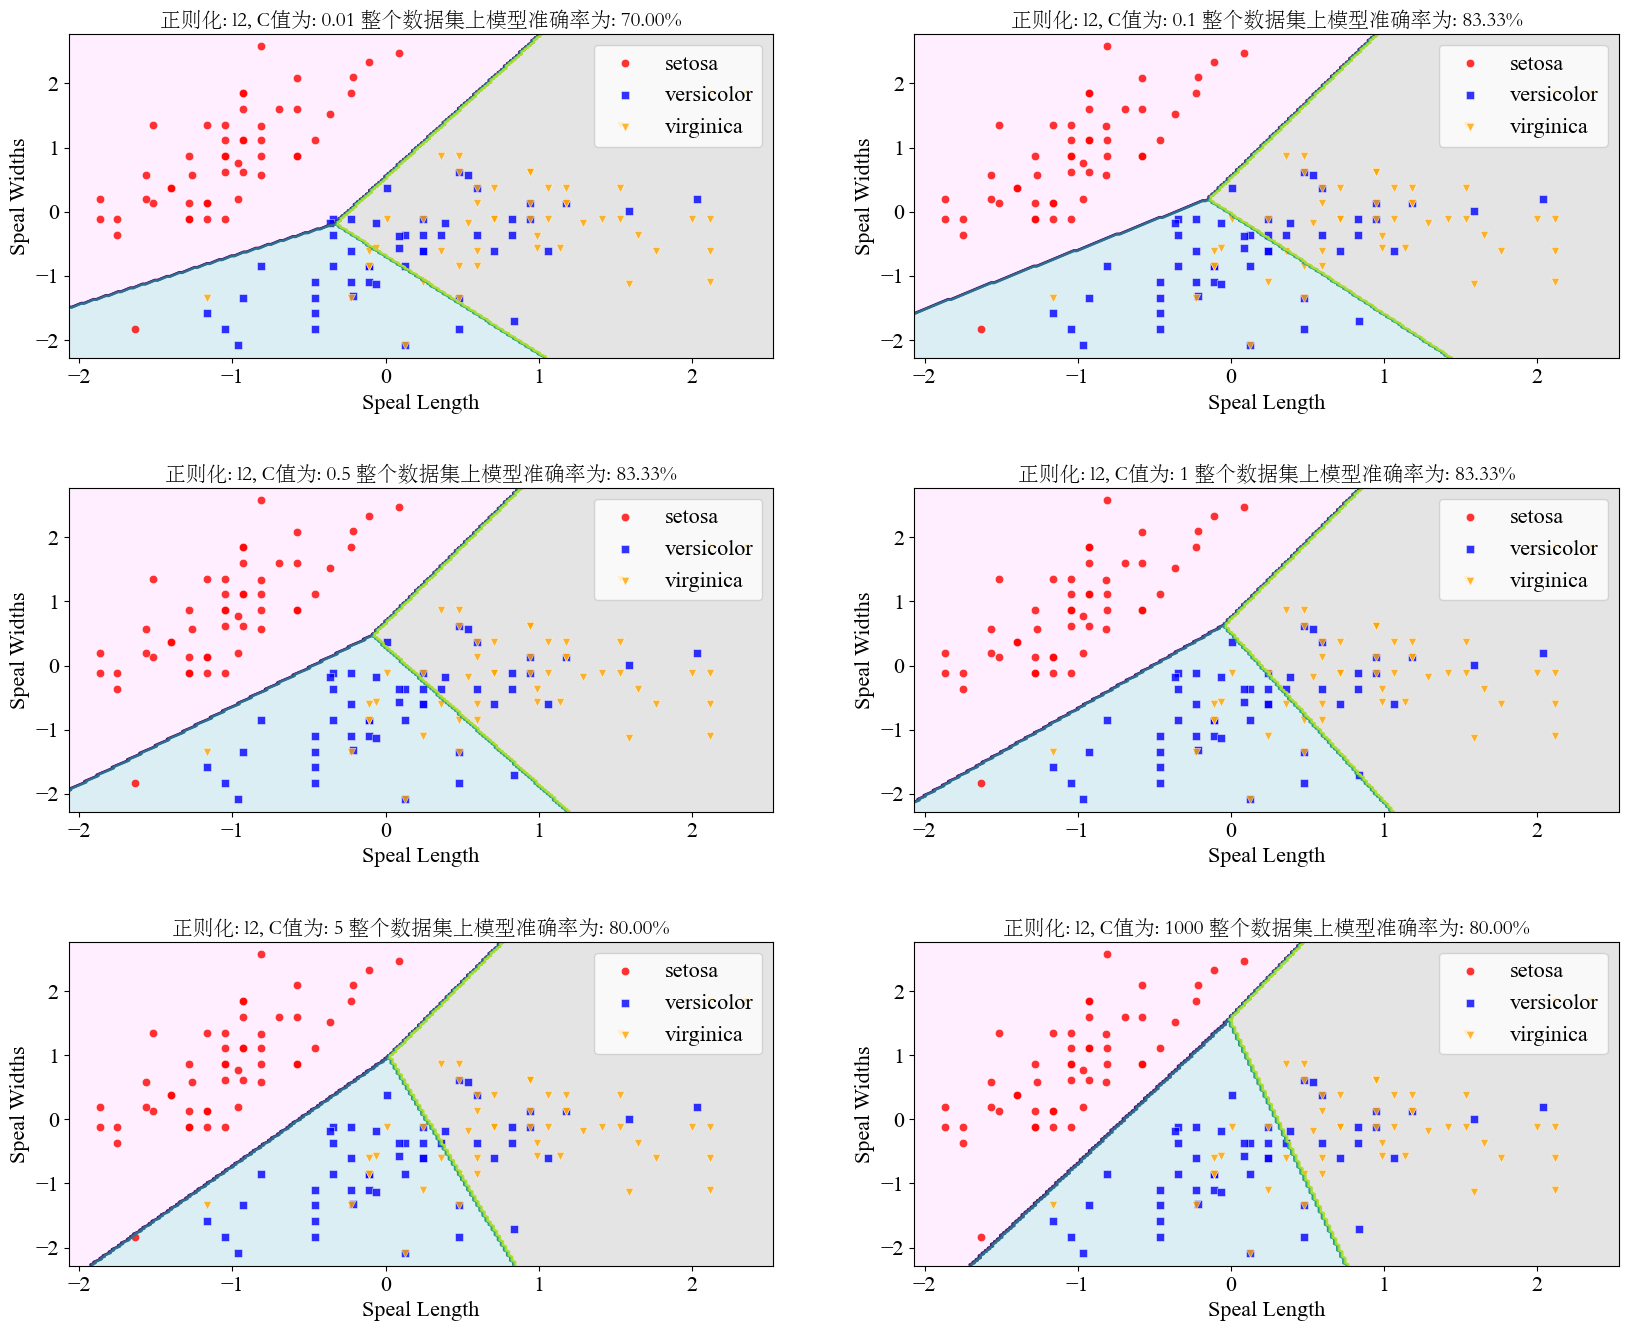

In [171]:
from sklearn.metrics import accuracy_score # 准确率指标
plt.rcParams['font.size'] = 16
C_param_range = [0.01, 0.1, 0.5, 1,5, 1000]
plt.figure(figsize=(20,16),dpi=100)
penalty = 'l2'
j = 0
for i in C_param_range:
    lr = LogisticRegression(penalty=penalty, C=i,
                            random_state=1210,)
    lr.fit(X_train_speal,y_train_speal) #训练模型
    y_pred_sepal = lr.predict(X_test_speal)
    score = accuracy_score(y_test_speal, y_pred_sepal) # 测试真实标签,和测试预测标签
    j += 1
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace=0.4)
    plot_region(X=X_combine_speal, y=Y_combine_speal, classifier=lr,
               penalty=penalty,C=i,score=score,tb=tb,
               )
    plt.xlim()

- 正则化参数penalty:
    1. L2正则化: 默认的正则化项,不填写默认L2,
    2. L1正则化: 若选择L1正则化,必须设置solver求解方式: 'liblinear', 'saga'
- C的参数:
    C是正则化强度的倒数,必须是一个大于0的数据,不填写默认是1,C越小,损失函数会 越小,模型对于损失函数的惩罚越重,正则化效率越.
    
 L1正则和L2正则都可以防止模型过你和,但是他们的效果并不相同,当正则化强度逐渐增大,C逐渐变小.这里L1正则化会讲参数压缩到0, L2正则化会将参数尽量缩小,但是不会取到0

### 参数max_iter

梯度下降中一个重要参数,代表训练过程中,能走到最大步数,也就是最大迭代次数. 

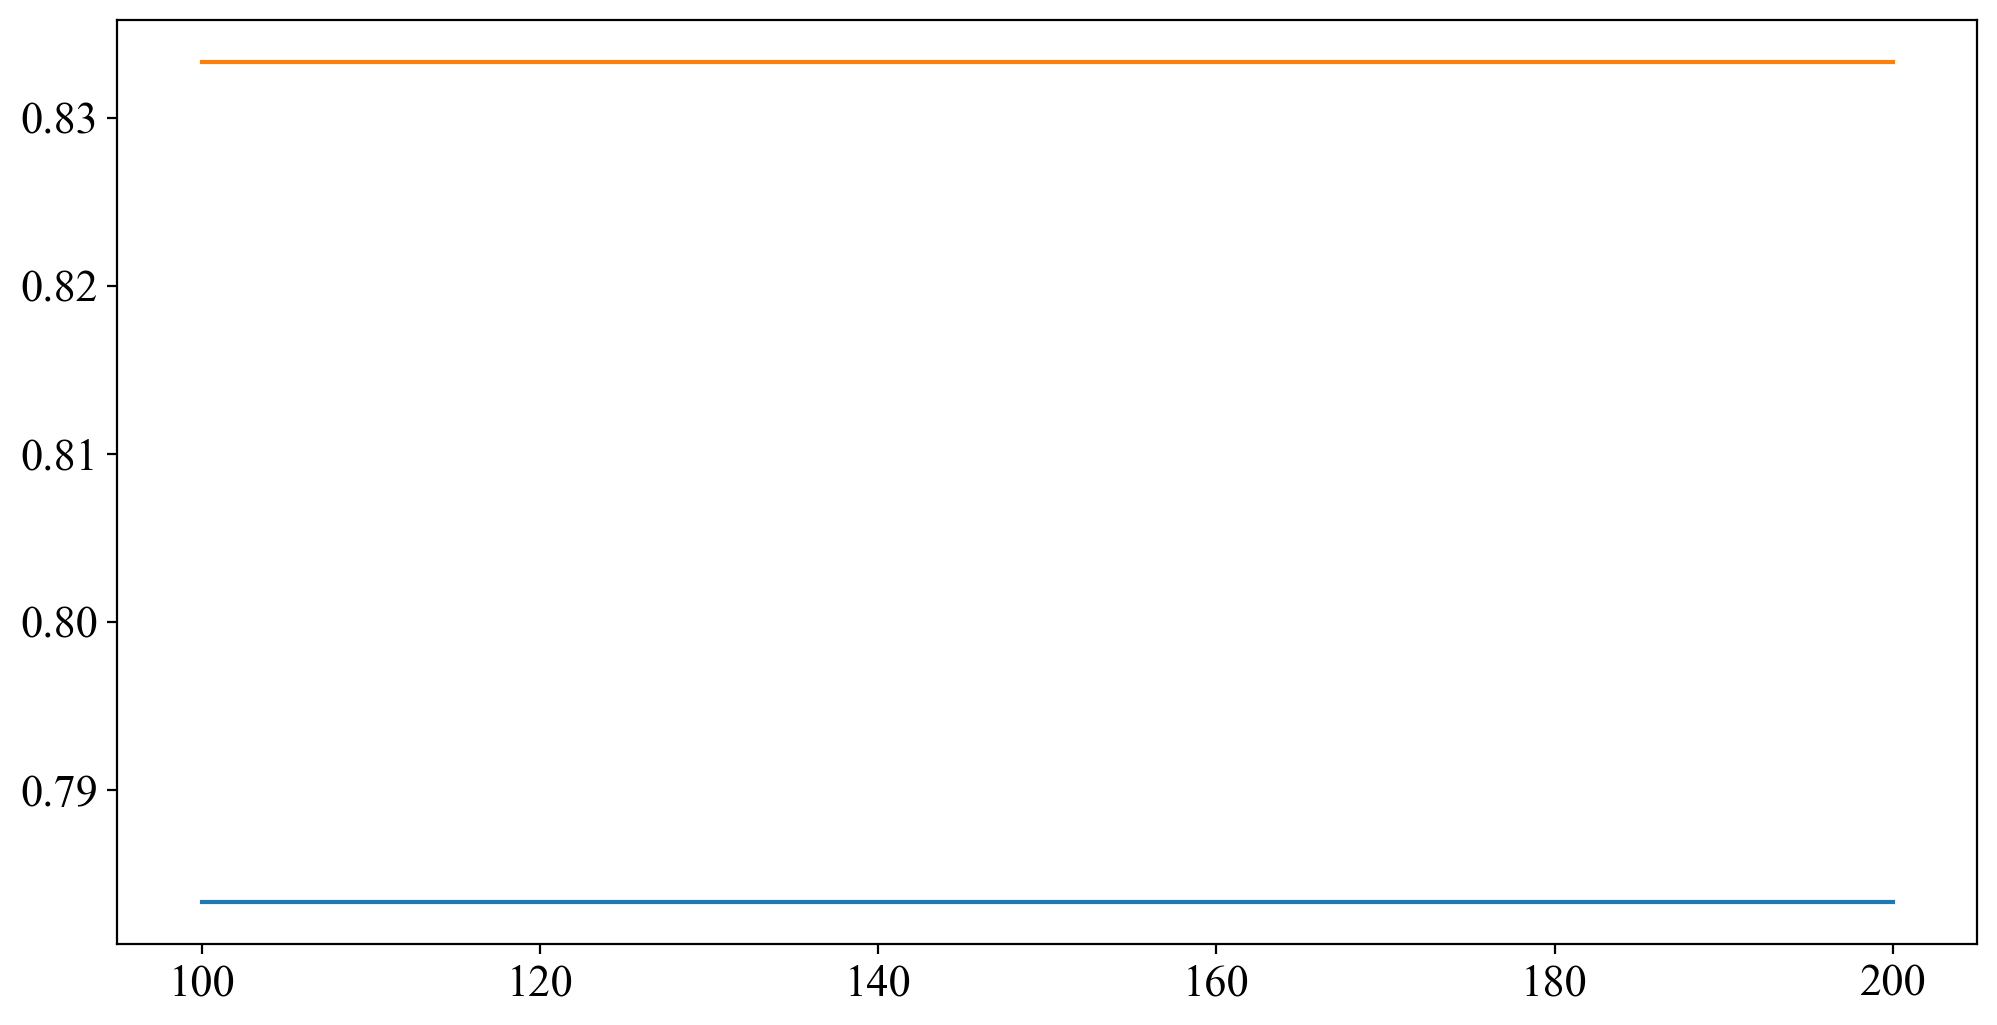

In [166]:
l2 = []
l2_test = []
ranges = range(100,201, 10)
for i  in ranges:
    lr = LogisticRegression(penalty='l2', C=0.1,max_iter=i,solver='sag',
                        random_state=1210,)
    lr.fit(X_train_speal, y_train_speal)
    l2.append(accuracy_score(lr.predict(X_train_speal),y_train_speal))
    l2_test.append(accuracy_score(lr.predict(X_test_speal), y_test_speal))
plt.figure(figsize=(12,6),dpi=200)
plt.plot(ranges,l2,label='Trainning Score')
plt.plot(ranges,l2_test, label='Test Score')
plt.show()

In [163]:
lr.n_iter_ # 求解真正的迭代次数

array([7])

当max_iter中限制的部署走完了,逻辑回归还没有找到损失函数的最小值,参数\thete的值,还没有收敛,sklearn就会给警告,
这种警告是在提醒我们,参数没有收敛,请增大max_iter中的输入数字.


- liblinear:  坐标下降法,支持二元 分类,但是不支持多元分类,支持L1正则和L2正则.对于未标准化的化的数据很有用
- sag: 随机梯度下降,与普通的随机梯度下降算法区别是每次迭代仅仅使用一部分样本数据来计算梯度, 对于未标准化的化的数据,使用不好
- lbfgs:拟牛顿法,利用损失函数的二阶导数矩阵(海森矩阵)来迭代优化损失函数.
- newton-cg:牛顿法的一种,
- saga: 随机平均梯度下降,

### solver和multi_class参数 

1. ovr: 表示问题是个二分类
2. multionmail: 表示处理多分类问题,这种时候输入参数solver是liblinear不可用
3. auto: 表示会根据数据的分类情况和其他参数来确定模型要处理分类问题的类型,默认是它

In [185]:
iris = datasets.load_iris()
iris['target']

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=1200, random_state=42,
        multi_class = multi_class).fit(iris.data, iris['target'])
    print(f'Trainning Socre: {clf.score(iris.data, iris.target)}, {multi_class}')

Trainning Socre: 0.98, multinomial
Trainning Socre: 0.9533333333333334, ovr


D:\Anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### 逻辑回归参数列表:

1. penalty:正则化项: 可以通过输入l1h或者l2来决定使用那种正则化方法,需要注意的是,使用L1正则化,solver参数仅能够使用liblinear和sage进行就求,

2. C:正则化强度大倒数,必须是一个大于0的浮点数,C越小,损失函数会越小,模型对损失函数的惩罚越重,
3. dual:布尔值,默认是False,使用对偶或者原始方式计算,只有在使用求解器liblinear和l2正则一起使用时有效.
4. tol: 浮点数默认1.0 * 10^-4, 早停策略,让迭代停下来的最小值,数字越大,迭代越早停下来
5. fit_intercept: 是否开启截距项,默认是True
6. class_weight: 字典,字典的列表, 与标签相关的权重,
7. random_state: 随机数种子
8. solver求解器:用于求解最优化参数的算法,
   - liblinear在小数据集上是一个不错的选择
   - sag和saga,随机梯度下降和随机平均梯度下降,对于大数据集老说更快,
   - 对于多分类问题L:只有;newton-cg, sag, saga, 和lbfgs能够处理多分类问题,
9. max_iter: 求解器收敛点最大迭代次数, 适用与newton_cg和sag, lbgfs求解器
10. multi_class:
    - ovr : 表示问题是普通的二分类
    - multionomial:多分类任务,最小化损失函数是拟合在整个概率分布上的多项式损失函数..
    - auto:
11. n_jobs: 整数或者None, 平行计算类别是使用的CPU线程数量,

In [186]:
clf.coef_ # 决策函数的参数,逻辑回归的预测函数证明,特征对应的系数
clf.intercept_  # 决策函数中的截距项
clf.n_iter_ #所有分类的实际迭代次数

array([1181,  437,  906])

In [193]:
clf.decision_function(iris.data) # 预测样本的置信度分数
clf.predict_log_proba(iris.data) # 这里应该传入测试集,返回的是每个样本点对应每个标签的对数概率
clf.predict_proba(iris.data) # 返回每个样本点对应每个标签的概率
clf.score(iris.data, iris.target) # 计算给定数据的平均准确度作为模型店评分标准
clf.get_params() #获取模型店参数

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1200,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'sag',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## 逻辑回归练习

In [222]:
data = pd.read_csv('./data/BankCustomer.csv')
data.head()

,Name,Gender,Age,City,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,Exited
0,Kan Jian,Female,40,Beijing,9,2,0,1,516,6360.66,0.0000,0
1,Xue Baochai,Male,69,Beijing,6,2,0,1,682,28605.00,0.0000,0
2,Mao Xi,Female,32,Beijing,9,1,1,1,803,10378.09,236311.0932,1
3,Zheng Nengliang,Female,37,Tianjin,0,2,1,1,778,25564.01,129909.8079,1
4,Zhi Fen,Male,55,Tianjin,4,3,1,0,547,3235.61,136976.1948,1


In [223]:
import sweetviz as sv

report = sv.analyze(data)
report.show_html()

                                             |                                                                …

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


目标: 利用这些字段来创建一个模型,来预测新的用户是否会流失!

1. 性别字段: 二元分类特征,需要将其转为0/1两种格式进行处理
2. city: 多元类别特征,使用哑变量处理.get_dummies进行处理
3. 姓名字段: 无字段可以做删除处理

In [198]:
d_city = pd.get_dummies(data['City'], prefix='city')
data = pd.concat([d_city,data],axis=1)
data.drop(labels=['Name','City'],axis=1,inplace=True)
data['Gender'] = data['Gender'].map({'Female':1,'Male':0})

In [205]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1210)

In [220]:
lr = LogisticRegression(penalty='l2',C=0.1,multi_class='ovr',max_iter=3000,
                      solver='liblinear', 
                       )
lr.fit(X_train, y_train) # 训练模型
print(f"逻辑回归测试集准确率为: {lr.score(X_test, y_test) * 100:.3f}%")

逻辑回归测试集准确率为: 78.150%


1. 有一个手机生产厂商,每天生产手机1000部, 某一天生产的手机当中,出现了2个劣质品. 
**目前要通过机器学习来分析数据的特征,鉴定劣质品的样本.**

1000个样本,所有预测的准确率是: 998合格品+1个劣质品 / 总样本数 =  99.9%
    
劣质品: 1 / 2 = 50% 

- TN:  模型正确预测为负类的实例数量
- TP:  模型正确预测为正类的实例数量
- FP: 模型错误的将负类样本预测为正类样本的数量
- FN: 模型错误的将正类样本预测为负类样本的数量

精确率:也称为查准确率:  TP / (TP + FP):  被模型预测为正的正样本 / (被模型预测为正正样本 + 被模型预测为负正样本)
            
这个模型对于劣质品的精确率是不差的,因为判定的一个劣质品果然是劣质品,没有任何合格品被判断为劣质品

召回率: 也称为查全率, TP / (TP +FN): 1 / (1 + 1) = 50%
        
召回率针对的是假负的衡量< 需要考虑那些被误判为合格品的劣质品,这种情况正是需要被找回产品.

F1 socre : 精确率和召回率的调和平均,常用于不均衡的数据集,

$F1 = 2 * \frac{精确率 * 召回率}{精确率 + 召回率}$$

准确率: $$\frac{TN+TP}{TN +TP + FN + FP}$$

猜测猫和狗:
    
1. 预测是猫,实际上也是猫: TP
2. 预测这不是猫, 实际上它确实不是猫: TN
3. 预测这是猫, 实际上不是猫,是狗, 模型误把狗当成了猫, 称为假阳性 FP
4. 预测这不是猫,实际上它是猫, 模型误把猫当成狗, 称为假阴性, FN

- 准确率: 所有预测正确猫和狗占总样本的数量

- 精确率: 模型预测为猫的图片当中,有多少真的就是猫, 衡量模型有多挑剔
- 召回率: 模型在所有事猫的照片当中, 有多少被正确识别了.

In [225]:
from sklearn.metrics import classification_report
from rich import print

In [226]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.79      0.98      0.88      1572
           1       0.43      0.07      0.11       428

    accuracy                           0.78      2000
   macro avg       0.61      0.52      0.49      2000
weighted avg       0.72      0.78      0.71      2000